### Final Project - Machine learning
- 521H0512 - Đặng Xuân Thịnh
- 521H0244 - Phan Thành Huy

- The dataset used in this project was downloaded from the Hass Avocado Board wabsite in May of 2018 and taken from Kaggle
- Link to this dataset: https://www.kaggle.com/datasets/neuromusic/avocado-prices
- Link to Hass Avocado Board: https://hassavocadoboard.com
- The columns in the dataset are as follow:
    - Date - The date of the observation
    - AveragePrice - the average price of a single avocado (target)
    - type - conventional or organic
    - year - the year
    - Region - the city or region of the observation
    - Total Volume - Total number of avocados sold
    - 4046 - Total number of avocados with PLU 4046 sold
    - 4225 - Total number of avocados with PLU 4225 sold
    - 4770 - Total number of avocados with PLU 4770 sold

### Dataset import and initial observation

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from keras.regularizers import l2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras import layers
from keras import models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
filename = "avocado.csv"
df = pd.read_csv(filename)

In [4]:
df.shape

(18249, 14)

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- We can see that __Unnamed: 0__ is an irrelevant feature used for indexing so we'll have to remove it later

In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
print(df.isnull().sum())

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


- Judging from initial observation we can see that there's no missing data

### Data preprocessing
- Earlier we know that __Unnamed: 0__ is a useless feature so we'll remove it
- We also know that the feature __Date__ is of type __object__ and not __datetime__ so we'll have to address that

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


- Now the __Date__ feature is of type __datetime64__, we only have 2 features of type __object__ which are __type__ and __region__

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- Let's take a look at the remaining categorical features

In [12]:
print(df['region'].nunique())

54


In [13]:
print(df['type'].nunique())

2


- The feature __region__ has 54 unique values whereas __type__ only has 2

In [14]:
print(df['type'].unique())

['conventional' 'organic']


- After looking at the dataset, the __type__ feature represents the avocado as __organic__ or __conventional__

### Data visualization

- Correlation matrix to know how our features are correlated to each other

<Figure size 1000x800 with 0 Axes>

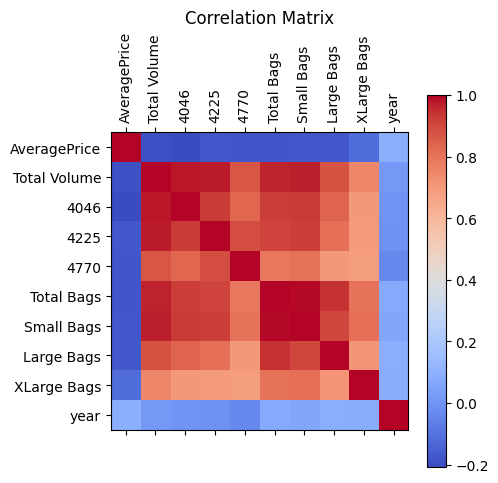

In [15]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

- Since there are 2 __type__, __organic__ and __conventional__, let's plot a pie chart based on the total volume sold on each type to see which is in more demand

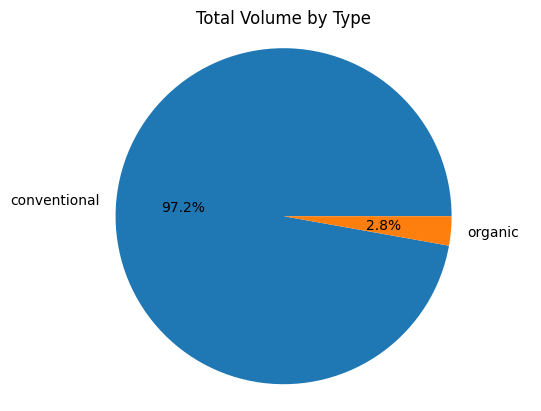

In [16]:
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

plt.pie(Type, labels=Type.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Total Volume by Type')
plt.show()

- Now let's look at the __Average Price__, which is our target feature and see how it is distributed over time

C:\Users\Admin\AppData\Local\Temp\ipykernel_25052\1906040803.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  byDate=df.groupby('Date').mean()


Text(0.5, 1.0, 'Average Price')

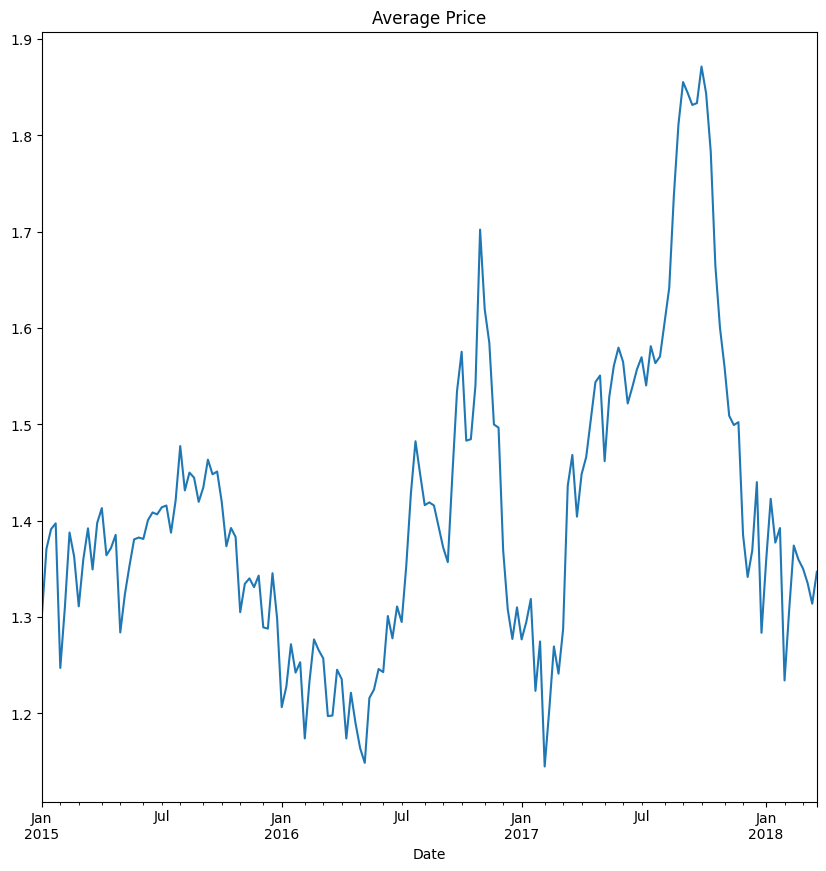

In [17]:
byDate = df.groupby('Date').mean(numeric_only=True)
plt.figure(figsize=(10,10))
byDate['AveragePrice'].plot()
plt.title('Average Price')

- Now let's plot some histograms to see how our data is distributed, note that i didn't plot the __Date__ column for the sake of visualization since it contains too many unique values

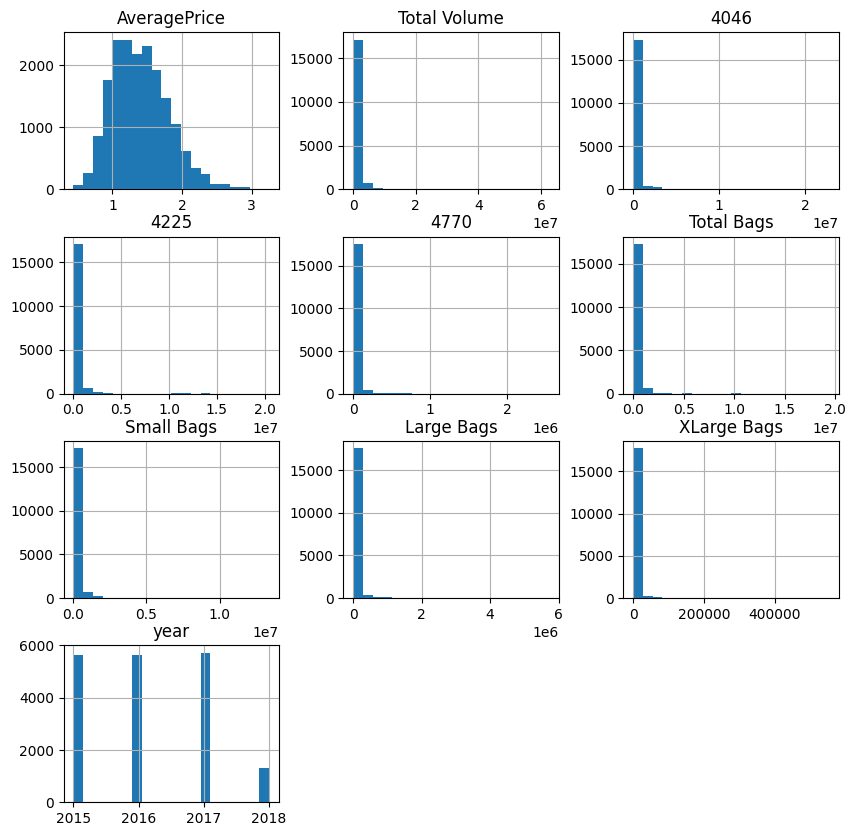

In [18]:
df_exclude_date = df.copy()
df_exclude_date.drop(columns=['Date'], inplace=True)
df_exclude_date.hist(bins=20, figsize=(10, 10))
plt.show()

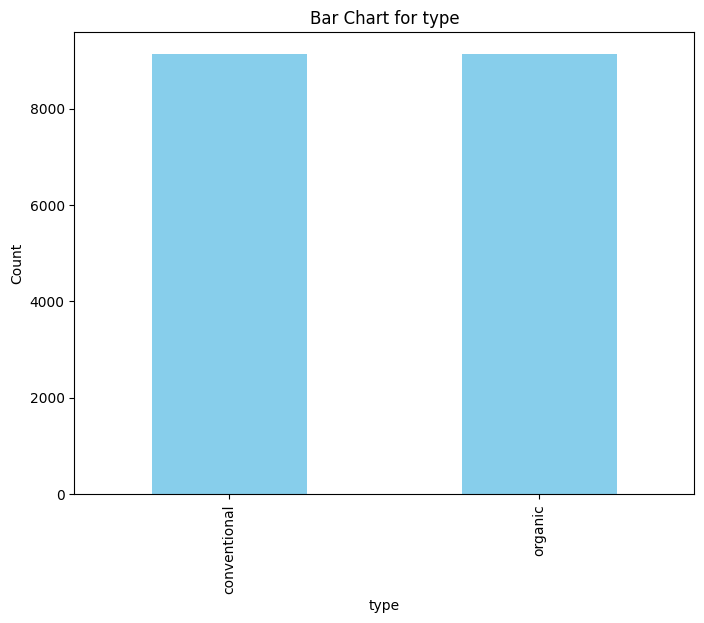

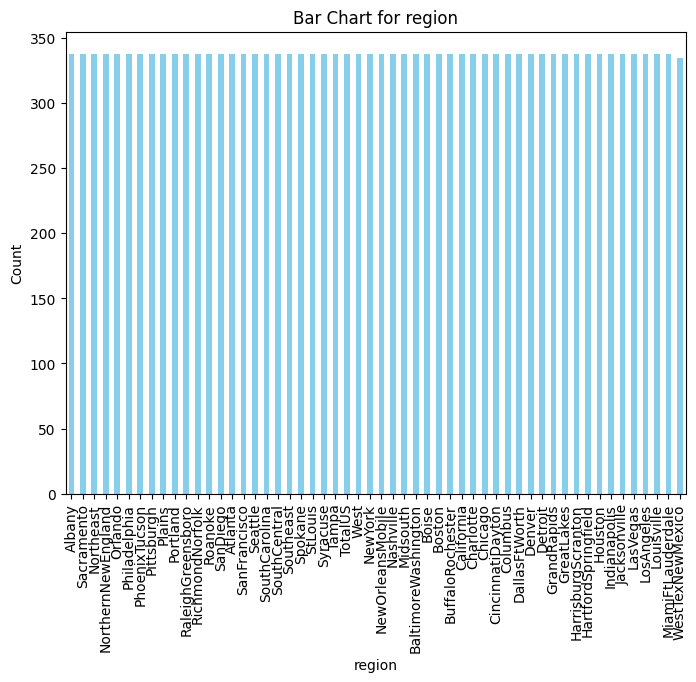

In [19]:
for column in df_exclude_date.columns:
    if not np.issubdtype(type(df_exclude_date[column].values[0]), np.number):  # Check if the column contains categorical data
        plt.figure(figsize=(8, 6))
        df_exclude_date[column].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Bar Chart for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

### Feature engineering and getting ready for training
- One thing to notice is that in our dataset the __Date__ feature contains information about the day, month and year. But there's actually another feature __Year__ that has the same year as the year in __Date__. Therefore we'll seperate the __Date__ feature into 2 numeric features __Month__ and __Date__ and the drop the __Date__ column completely

In [20]:
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Day'] = df['Date'].apply(lambda x:x.day)
df.drop(columns=['Date'], inplace=True)

- Then we'll have to deal with the two categorical features __type__ and __region__
- __type__ only has two values so we can easily transform it into dummies data
- As for the __region__ since it contains at lot of unique values, we can either drop it completely or use a library to transform it. For now we'll keep it and use a library to transform it to numeric values

In [21]:
label_encoder = LabelEncoder()

df['type'] = label_encoder.fit_transform(df['type'])
print(df['type'].unique())

df['region'] = label_encoder.fit_transform(df['region'])
print(df['region'].unique())


[0 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]


- Let's look at our final dataset again

In [22]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


- Data spliting

In [24]:
X = df.iloc[:,1:].values
y = df['AveragePrice'].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

### Model selection and training/predicting

Linear Regression

MSE: 0.08997812485644437
MAE: 0.23137879766509853


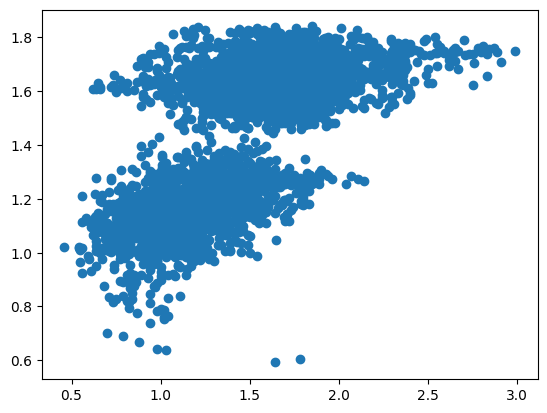

In [25]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
pred = linear_regression.predict(X_test)

print('MSE:', mean_squared_error(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))

plt.scatter(y_test,pred)

- For our LinearRegression model, although the MSE is low, when we plot the predict result versus the actual result, the data points don't quite form a straighline, meaning that there's room for improvement
- Now we'll try to build some more different models

KNeighborsRegressor

MSE: 0.05706179604261796
MAE: 0.16602739726027396


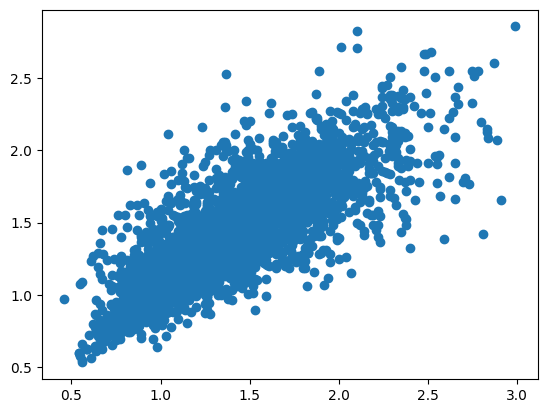

In [26]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('MSE:', mean_squared_error(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))

plt.scatter(y_test,pred)

Decision Tree

MSE: 0.03551616438356164
MAE: 0.12435616438356163


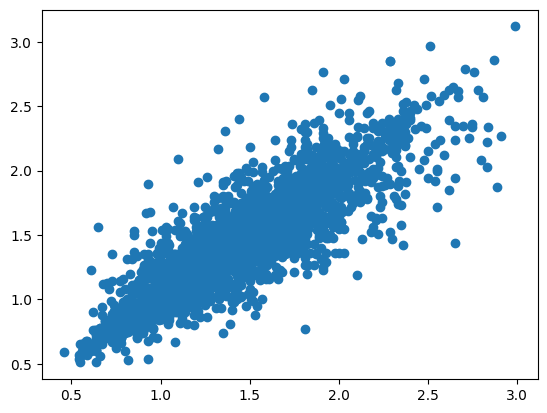

In [27]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
pred = decision_tree.predict(X_test)

print('MSE:', mean_squared_error(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))

plt.scatter(y_test,pred)

Random Forest

MSE: 0.018255819145205483
MAE: 0.09329819178082192


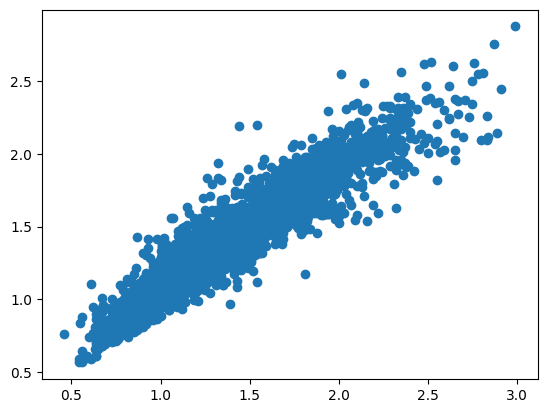

In [28]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
pred = random_forest.predict(X_test)

print('MSE:', mean_squared_error(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))

plt.scatter(y_test,pred)

Gradient Boosting

MSE: 0.03949911997392936
MAE: 0.14849290473441962


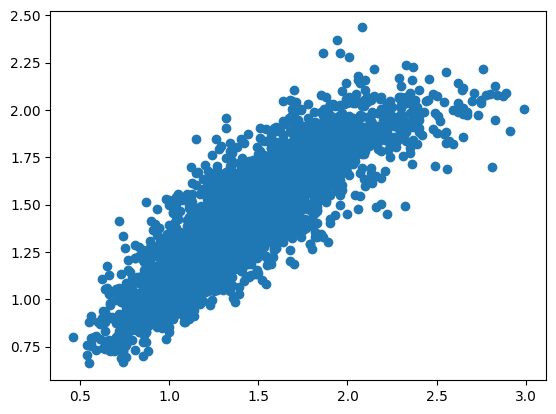

In [29]:
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train,y_train)
pred = gradient_boosting.predict(X_test)

print('MSE:', mean_squared_error(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))

plt.scatter(y_test,pred)

- Looking at the results, we can see that __Radom Forest__ gives the best performanace

### Neural Network
- Now we'll use Feed Forward Neural Network and Recurrent Neural Network (RNN) so solve this problem
- Note that RNN is not a suitable model for this problem. The reason is because the data in this problem is not sequential and RNN is typically suited for tasks that involve sequential data such as natural language processing, speech recognition, image analysis,...

Recurrent Neural Network

In [30]:
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

rnn = models.Sequential()
rnn.add(layers.SimpleRNN(units=125, activation='tanh', input_shape=(13, 1)))
rnn.add(layers.Dense(units=1))
rnn.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])

rnn.fit(X_train_reshaped, y_train, epochs=50, batch_size=32)

pred = rnn.predict(X_test)

print('MSE:', mean_squared_error(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))

Epoch 1/50
457/457 [==============================] - 2s 2ms/step - loss: 0.1712 - mean_squared_error: 0.1712
Epoch 2/50
457/457 [==============================] - 1s 2ms/step - loss: 0.1644 - mean_squared_error: 0.1644
Epoch 3/50
457/457 [==============================] - 1s 2ms/step - loss: 0.1616 - mean_squared_error: 0.1616
Epoch 4/50
457/457 [==============================] - 1s 2ms/step - loss: 0.1586 - mean_squared_error: 0.1586
Epoch 5/50
457/457 [==============================] - 1s 2ms/step - loss: 0.1583 - mean_squared_error: 0.1583
Epoch 6/50
457/457 [==============================] - 1s 3ms/step - loss: 0.1561 - mean_squared_error: 0.1561
Epoch 7/50
457/457 [==============================] - 1s 2ms/step - loss: 0.1550 - mean_squared_error: 0.1550
Epoch 8/50
457/457 [==============================] - 1s 2ms/step - loss: 0.1565 - mean_squared_error: 0.1565
Epoch 9/50
457/457 [==============================] - 1s 2ms/step - loss: 0.1537 - mean_squared_error: 0.1537
Epoch 10/5

Feed Forward Neural Network

In [31]:
ffn = models.Sequential()
ffn.add(layers.Dense(64, activation='relu'))
ffn.add(layers.Dense(32, activation='relu'))
ffn.add(layers.Dense(16, activation='relu'))
ffn.add(layers.Dense(1))
ffn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
ffn.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

Epoch 1/60
457/457 [==============================] - 1s 1ms/step - loss: 35492745216.0000 - mean_squared_error: 35492745216.0000 - val_loss: 58744512.0000 - val_mean_squared_error: 58744512.0000
Epoch 2/60
457/457 [==============================] - 0s 1ms/step - loss: 35183412.0000 - mean_squared_error: 35183412.0000 - val_loss: 12308030.0000 - val_mean_squared_error: 12308030.0000
Epoch 3/60
457/457 [==============================] - 0s 1ms/step - loss: 14077409.0000 - mean_squared_error: 14077409.0000 - val_loss: 16664058.0000 - val_mean_squared_error: 16664058.0000
Epoch 4/60
457/457 [==============================] - 0s 1ms/step - loss: 13160413.0000 - mean_squared_error: 13160413.0000 - val_loss: 5851360.0000 - val_mean_squared_error: 5851360.0000
Epoch 5/60
457/457 [==============================] - 0s 1ms/step - loss: 58188380.0000 - mean_squared_error: 58188380.0000 - val_loss: 40608676.0000 - val_mean_squared_error: 40608676.0000
Epoch 6/60
457/457 [==========================

### Overfitting preventing techniques

Apply techniques Overfitting
For linear regression, avoiding overfitting typically involves regularization techniques. In the case of linear regression, L1 regularization (Lasso) and L2 regularization (Ridge) are commonly used. Here, I'll demonstrate how to apply Ridge regularization as an example:

Best Alpha: 10
MSE: 0.08939727274971795
MAE: 0.23104349759565918


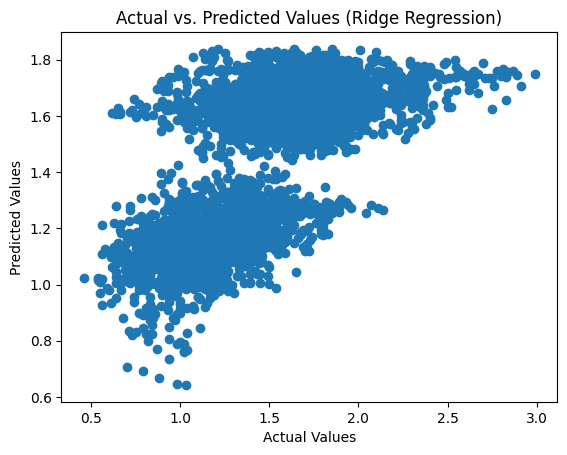

In [32]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Initialize Ridge regression model
ridge_regression = Ridge()

# Define a range of alpha values to try
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Perform grid search to find the best alpha
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge_regression, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha from the grid search
best_alpha = grid_search.best_params_['alpha']

# Create a new Ridge regression model with the best alpha
best_ridge_regression = Ridge(alpha=best_alpha)

best_ridge_regression.fit(X_train_scaled, y_train)

pred = best_ridge_regression.predict(X_test_scaled

print('Best Alpha:', best_alpha)
print('MSE:', mean_squared_error(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))

plt.scatter(y_test, pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.show()


 To compare the performance of the model with and without overfitting techniques, let's create a function that encapsulates the training and evaluation process for a given model. We'll use the mean squared error (MSE) as the evaluation metric.

Linear Regression MSE: 0.08997812485665871
Ridge Regression MSE: 0.08939727274971795


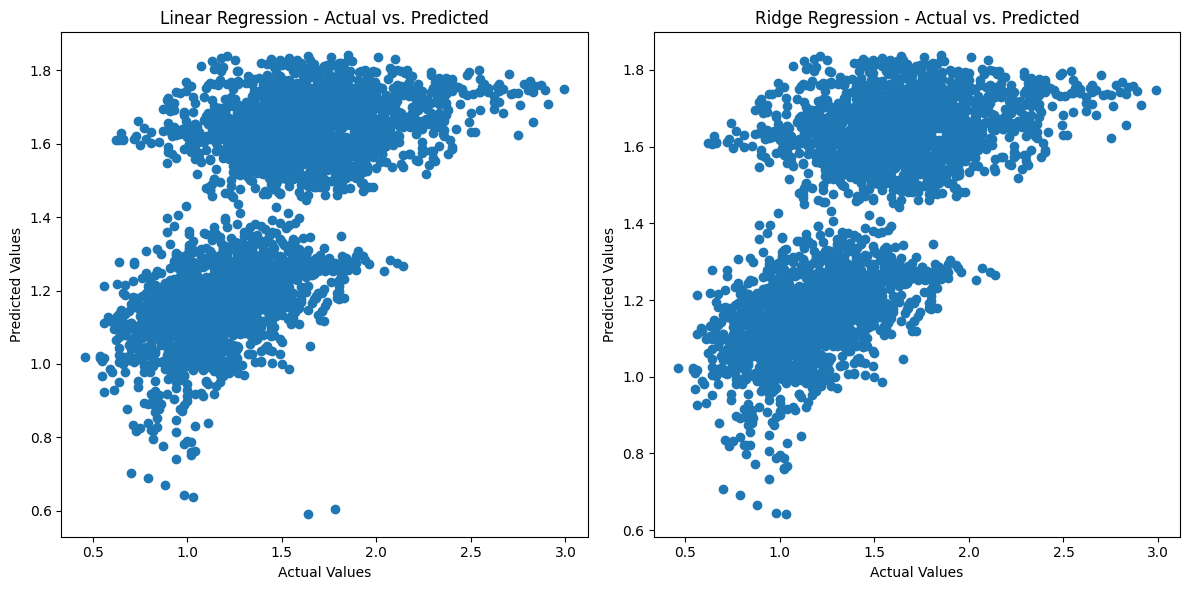

In [33]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    return mse, pred

# Train and evaluate Linear Regression without regularization
linear_regression = LinearRegression()
mse_linear, pred_linear = train_and_evaluate(linear_regression, X_train_scaled, y_train, X_test_scaled, y_test)

# Train and evaluate Ridge Regression with regularization
ridge_regression = Ridge(alpha=best_alpha)
mse_ridge, pred_ridge = train_and_evaluate(ridge_regression, X_train_scaled, y_train, X_test_scaled, y_test)

# Print MSE for both models
print('Linear Regression MSE:', mse_linear)
print('Ridge Regression MSE:', mse_ridge)

# Visualize predictions for both models
plt.figure(figsize=(12, 6))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, pred_linear)
plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Ridge Regression plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_ridge)
plt.title('Ridge Regression - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


We compare the performance of KNN with k=3 (default) and k=10 (larger). A larger k tends to smooth the decision boundary, reducing the chances of overfitting.

KNN (k=3) MSE: 0.05706179604261796
KNN (k=3) MAE: 0.16602739726027396
KNN (k=10) MSE: 0.054371458082191786
KNN (k=10) MAE: 0.1677780821917808


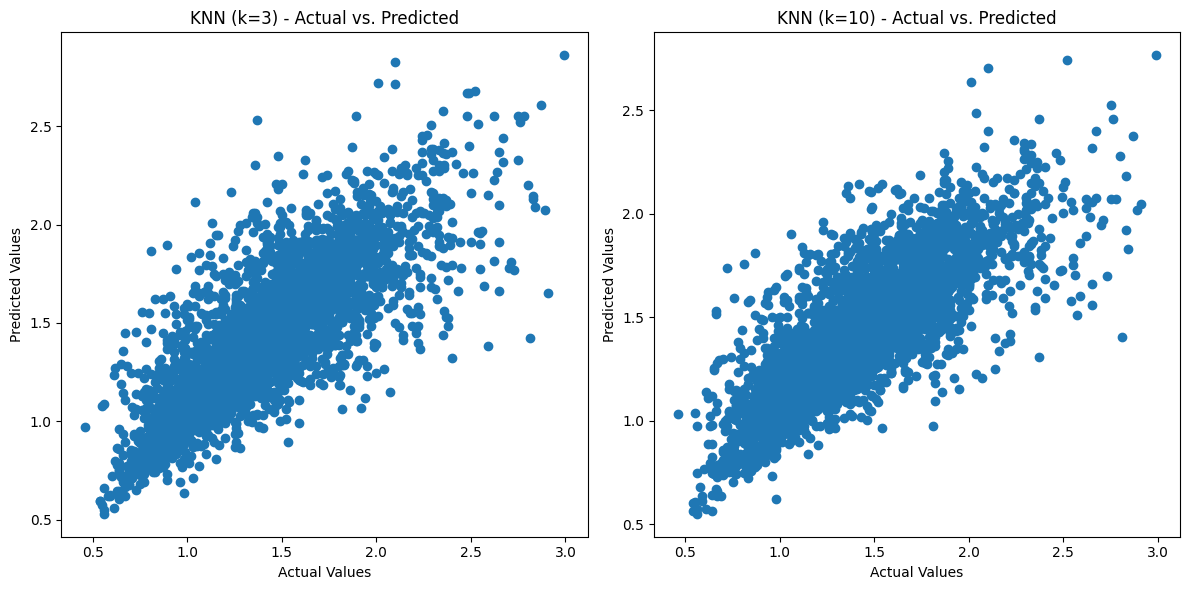

In [34]:
def train_and_evaluate_knn_model(k, X_train, y_train, X_test, y_test):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    return mse, mae, pred

# Train and evaluate KNN without adjusting k (may lead to overfitting)
mse_knn_default, mae_knn_default, pred_knn_default = train_and_evaluate_knn_model(3, X_train, y_train, X_test, y_test)

# Train and evaluate KNN with a larger k (to potentially reduce overfitting)
mse_knn_larger_k, mae_knn_larger_k, pred_knn_larger_k = train_and_evaluate_knn_model(10, X_train, y_train, X_test, y_test)

print('KNN (k=3) MSE:', mse_knn_default)
print('KNN (k=3) MAE:', mae_knn_default)

print('KNN (k=10) MSE:', mse_knn_larger_k)
print('KNN (k=10) MAE:', mae_knn_larger_k)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, pred_knn_default)
plt.title('KNN (k=3) - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_knn_larger_k)
plt.title('KNN (k=10) - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


For Decision Tree models, overfitting can often be controlled by adjusting hyperparameters related to the depth and complexity of the tree. Specifically, you can experiment with the (max_depth) parameter to limit the depth of the tree.

Decision Tree (No Depth Limit) MSE: 0.03620630136986302
Decision Tree (No Depth Limit) MAE: 0.1242904109589041
Decision Tree (Depth Limit=5) MSE: 0.06394612522340512
Decision Tree (Depth Limit=5) MAE: 0.19290078205135736


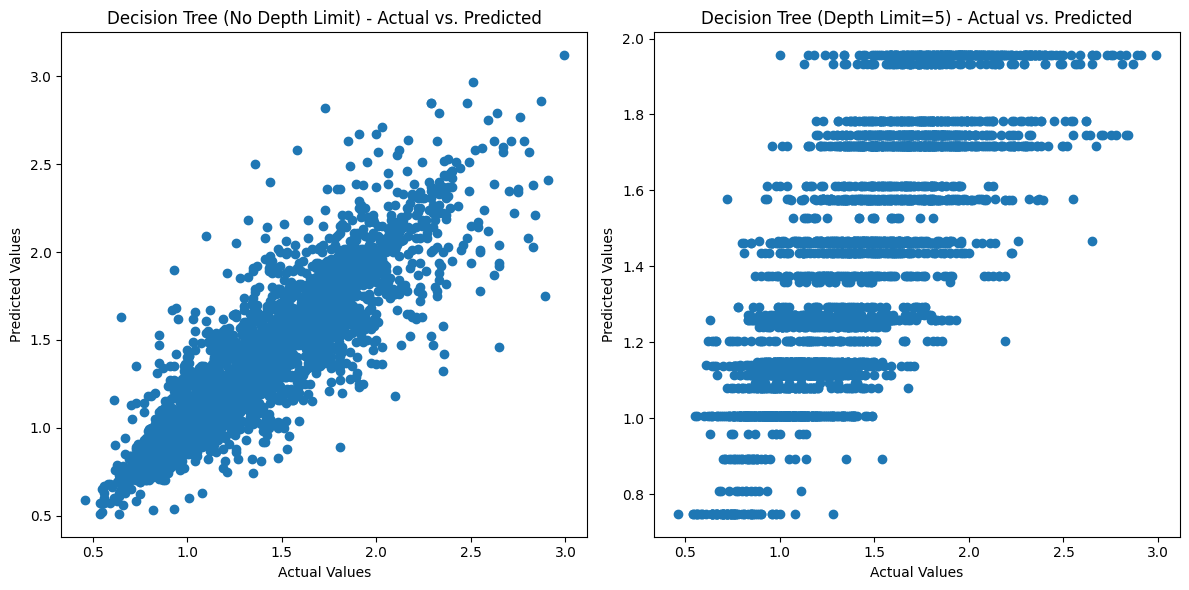

In [35]:
def train_and_evaluate_decision_tree_model(max_depth, X_train, y_train, X_test, y_test):
    decision_tree = DecisionTreeRegressor(max_depth=max_depth)
    decision_tree.fit(X_train, y_train)
    pred = decision_tree.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    
    return mse, mae, pred

# Train and evaluate Decision Tree without depth restriction (may lead to overfitting)
mse_tree_no_limit, mae_tree_no_limit, pred_tree_no_limit = train_and_evaluate_decision_tree_model(None, X_train, y_train, X_test, y_test)

# Train and evaluate Decision Tree with a limited depth (to reduce overfitting)
mse_tree_with_limit, mae_tree_with_limit, pred_tree_with_limit = train_and_evaluate_decision_tree_model(5, X_train, y_train, X_test, y_test)

print('Decision Tree (No Depth Limit) MSE:', mse_tree_no_limit)
print('Decision Tree (No Depth Limit) MAE:', mae_tree_no_limit)

print('Decision Tree (Depth Limit=5) MSE:', mse_tree_with_limit)
print('Decision Tree (Depth Limit=5) MAE:', mae_tree_with_limit)


plt.figure(figsize=(12, 6))

# Scatter plot for Decision Tree without depth limit
plt.subplot(1, 2, 1)
plt.scatter(y_test, pred_tree_no_limit)
plt.title('Decision Tree (No Depth Limit) - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for Decision Tree with depth limit
plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_tree_with_limit)
plt.title('Decision Tree (Depth Limit=5) - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

For Random Forest models, overfitting can be addressed by adjusting hyperparameters such as the number of trees (n_estimators), the maximum depth of the trees (max_depth), and the minimum samples split (min_samples_split). 

Random Forest (No Tuning) MSE: 0.018075025191780825
Random Forest (No Tuning) MAE: 0.09303575342465753
Random Forest (With Tuning) MSE: 0.026808214677100844
Random Forest (With Tuning) MAE: 0.11908055718975476


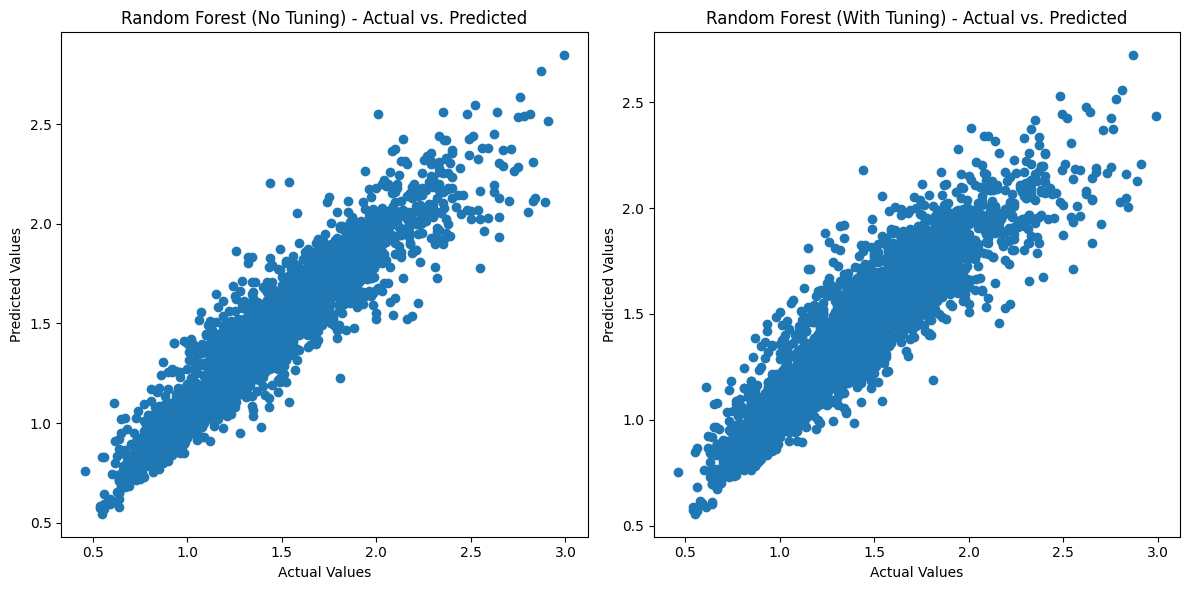

In [36]:
def train_and_evaluate_random_forest_model(X_train, y_train, X_test, y_test, n_estimators, max_depth, min_samples_split):
    random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    random_forest.fit(X_train, y_train)
    pred = random_forest.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    return mse, mae, pred

# Train and evaluate Random Forest without hyperparameter tuning (may lead to overfitting)
mse_rf_no_tuning, mae_rf_no_tuning, pred_rf_no_tuning = train_and_evaluate_random_forest_model(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=None, min_samples_split=2)

# Train and evaluate Random Forest with hyperparameter tuning (to potentially reduce overfitting)
mse_rf_with_tuning, mae_rf_with_tuning, pred_rf_with_tuning = train_and_evaluate_random_forest_model(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=10, min_samples_split=5)

print('Random Forest (No Tuning) MSE:', mse_rf_no_tuning)
print('Random Forest (No Tuning) MAE:', mae_rf_no_tuning)

print('Random Forest (With Tuning) MSE:', mse_rf_with_tuning)
print('Random Forest (With Tuning) MAE:', mae_rf_with_tuning)

plt.figure(figsize=(12, 6))

# Scatter plot for Random Forest without hyperparameter tuning
plt.subplot(1, 2, 1)
plt.scatter(y_test, pred_rf_no_tuning)
plt.title('Random Forest (No Tuning) - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for Random Forest with hyperparameter tuning
plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_rf_with_tuning)
plt.title('Random Forest (With Tuning) - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


For Gradient Boosting models, overfitting can be mitigated by tuning hyperparameters such as the learning rate (learning_rate), the number of boosting stages (n_estimators), and the maximum depth of the individual trees (max_depth)

Gradient Boosting (No Tuning) MSE: 0.03949911997392936
Gradient Boosting (No Tuning) MAE: 0.14849290473441965
Gradient Boosting (With Tuning) MSE: 0.023255983043052156
Gradient Boosting (With Tuning) MAE: 0.1130334017771661


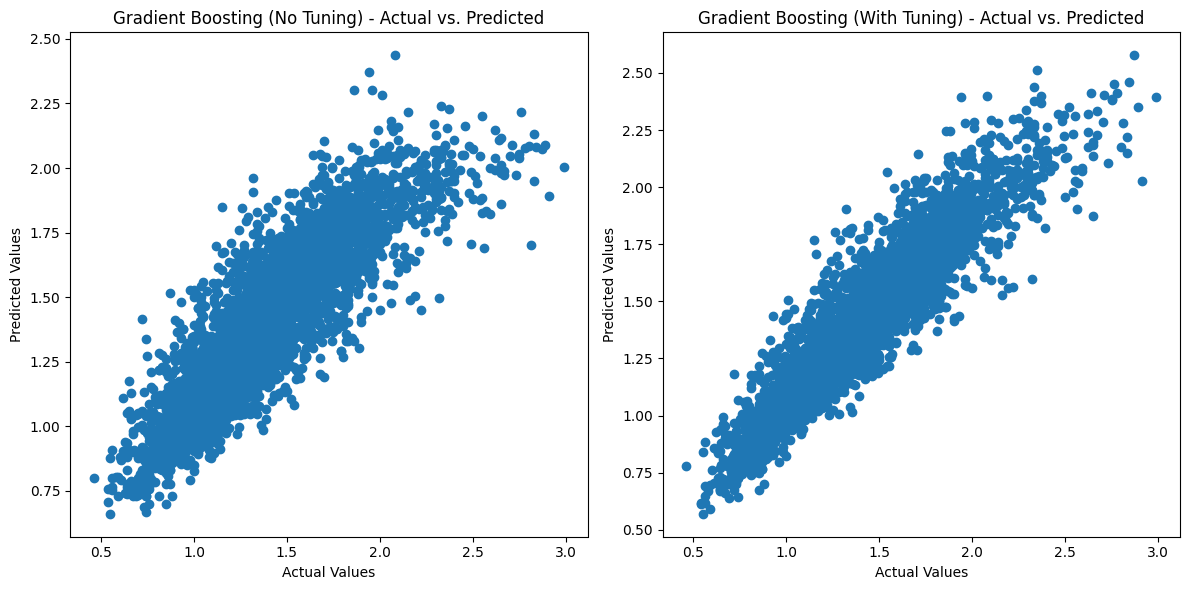

In [37]:
def train_and_evaluate_gradient_boosting_model(X_train, y_train, X_test, y_test, learning_rate, n_estimators, max_depth):
    gradient_boosting = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
    gradient_boosting.fit(X_train, y_train)
    pred = gradient_boosting.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    return mse, mae, pred

# Train and evaluate Gradient Boosting without hyperparameter tuning (may lead to overfitting)
mse_gb_no_tuning, mae_gb_no_tuning, pred_gb_no_tuning = train_and_evaluate_gradient_boosting_model(X_train, y_train, X_test, y_test, learning_rate=0.1, n_estimators=100, max_depth=3)

# Train and evaluate Gradient Boosting with hyperparameter tuning (to potentially reduce overfitting)
mse_gb_with_tuning, mae_gb_with_tuning, pred_gb_with_tuning = train_and_evaluate_gradient_boosting_model(X_train, y_train, X_test, y_test, learning_rate=0.05, n_estimators=200, max_depth=5)

print('Gradient Boosting (No Tuning) MSE:', mse_gb_no_tuning)
print('Gradient Boosting (No Tuning) MAE:', mae_gb_no_tuning)

print('Gradient Boosting (With Tuning) MSE:', mse_gb_with_tuning)
print('Gradient Boosting (With Tuning) MAE:', mae_gb_with_tuning)

plt.figure(figsize=(12, 6))

# Scatter plot for Gradient Boosting without hyperparameter tuning
plt.subplot(1, 2, 1)
plt.scatter(y_test, pred_gb_no_tuning)
plt.title('Gradient Boosting (No Tuning) - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for Gradient Boosting with hyperparameter tuning
plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_gb_with_tuning)
plt.title('Gradient Boosting (With Tuning) - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


For recurrent neural networks (RNNs), overfitting can be addressed by adjusting hyperparameters, adding dropout layers, or using more advanced architectures like Long Short-Term Memory (LSTM) or Gated Recurrent Unit (GRU) layers. Here, let's compare the performance of a SimpleRNN without any additional measures and a SimpleRNN with a dropout layer to mitigate overfitting:

115/115 [==============================] - 0s 1ms/step
SimpleRNN (No Dropout) MSE: 0.1499984382322915
SimpleRNN (No Dropout) MAE: 0.30964167890940625
SimpleRNN (With Dropout) MSE: 0.14965183207455482
SimpleRNN (With Dropout) MAE: 0.3102892822690206


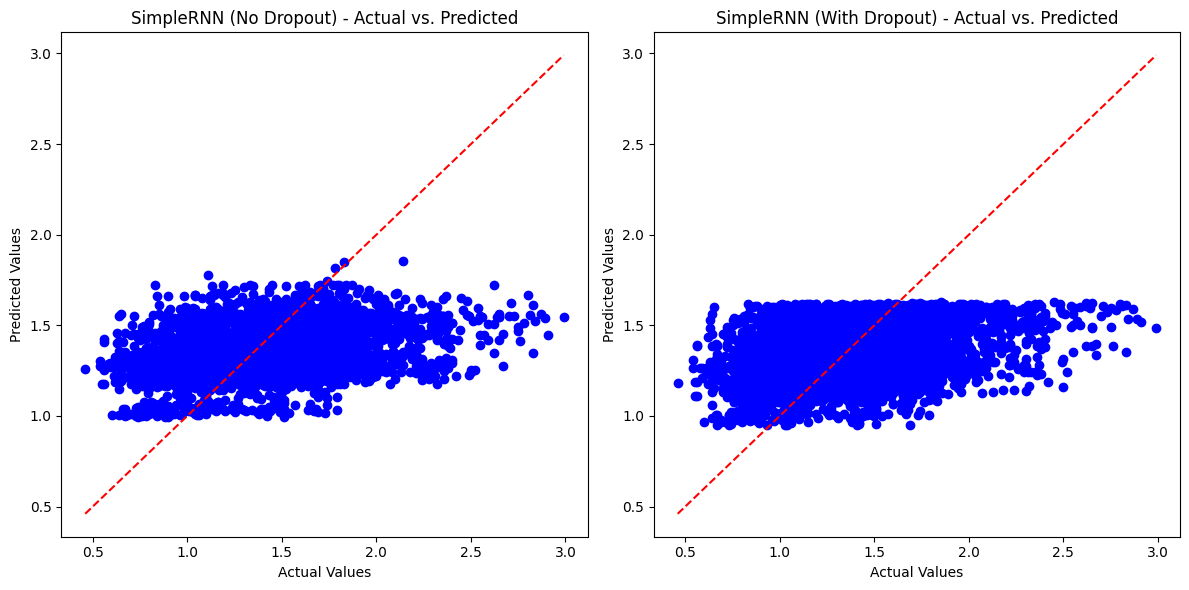

In [38]:
# Define and train SimpleRNN without dropout (may lead to overfitting)
rnn_no_dropout = models.Sequential()
rnn_no_dropout.add(layers.SimpleRNN(units=125, activation='tanh', input_shape=(X_train.shape[1], 1)))
rnn_no_dropout.add(layers.Dense(units=1))
rnn_no_dropout.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
rnn_no_dropout.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)  # verbose=0 to suppress training logs
pred_no_dropout = rnn_no_dropout.predict(X_test_reshaped)

# Define and train SimpleRNN with dropout (to potentially reduce overfitting)
rnn_with_dropout = models.Sequential()
rnn_with_dropout.add(layers.SimpleRNN(units=125, activation='tanh', input_shape=(X_train.shape[1], 1)))
rnn_with_dropout.add(layers.Dropout(0.2))  # Adding dropout layer
rnn_with_dropout.add(layers.Dense(units=1))
rnn_with_dropout.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
rnn_with_dropout.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)
pred_with_dropout = rnn_with_dropout.predict(X_test_reshaped)

# Evaluate both models
mse_no_dropout = mean_squared_error(y_test, pred_no_dropout)
mae_no_dropout = mean_absolute_error(y_test, pred_no_dropout)

mse_with_dropout = mean_squared_error(y_test, pred_with_dropout)
mae_with_dropout = mean_absolute_error(y_test, pred_with_dropout)

# Print MSE and MAE for both models
print('SimpleRNN (No Dropout) MSE:', mse_no_dropout)
print('SimpleRNN (No Dropout) MAE:', mae_no_dropout)

print('SimpleRNN (With Dropout) MSE:', mse_with_dropout)
print('SimpleRNN (With Dropout) MAE:', mae_with_dropout)


plt.figure(figsize=(12, 6))

# Plot for SimpleRNN without dropout
plt.subplot(1, 2, 1)
plt.scatter(y_test, pred_no_dropout, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('SimpleRNN (No Dropout) - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plot for SimpleRNN with dropout
plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_with_dropout, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('SimpleRNN (With Dropout) - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

To address overfitting in a Feed Forward Neural Network (FFNN), you can use techniques such as dropout, regularization (L1 or L2), or early stopping. Here, let's compare the performance of an FFNN without any additional regularization technique and an FFNN with dropout layers:

115/115 [==============================] - 0s 654us/step
FFNN (No Dropout) MSE: 0.2940541468544547
FFNN (No Dropout) MAE: 0.37164742799458433
FFNN (With Dropout) MSE: 1.1347630472521537
FFNN (With Dropout) MAE: 0.9858582434778344


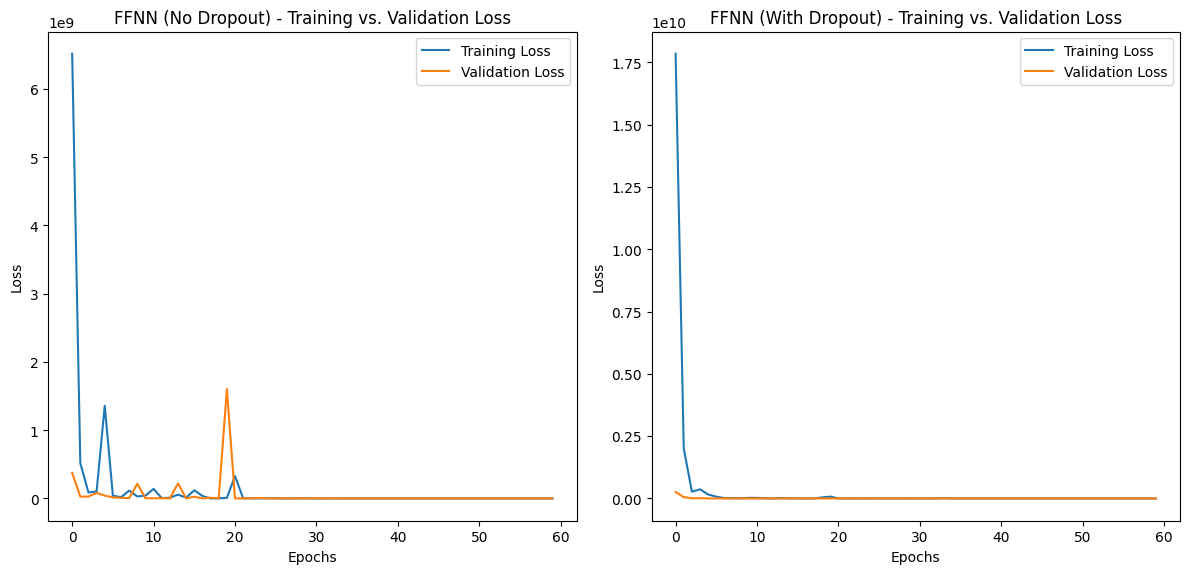

In [39]:
# Define and train FFNN without dropout (may lead to overfitting)
ffnn_no_dropout = models.Sequential()
ffnn_no_dropout.add(layers.Dense(64, activation='relu'))
ffnn_no_dropout.add(layers.Dense(32, activation='relu'))
ffnn_no_dropout.add(layers.Dense(16, activation='relu'))
ffnn_no_dropout.add(layers.Dense(1))
ffnn_no_dropout.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
history_no_dropout = ffnn_no_dropout.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=0)

# Define and train FFNN with dropout (to potentially reduce overfitting)
ffnn_with_dropout = models.Sequential()
ffnn_with_dropout.add(layers.Dense(64, activation='relu'))
ffnn_with_dropout.add(layers.Dropout(0.2))  # Adding dropout layer
ffnn_with_dropout.add(layers.Dense(32, activation='relu'))
ffnn_with_dropout.add(layers.Dropout(0.2))  # Adding dropout layer
ffnn_with_dropout.add(layers.Dense(16, activation='relu'))
ffnn_with_dropout.add(layers.Dense(1))
ffnn_with_dropout.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
history_with_dropout = ffnn_with_dropout.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=0)

# Evaluate both models
mse_no_dropout = mean_squared_error(y_test, ffnn_no_dropout.predict(X_test))
mae_no_dropout = mean_absolute_error(y_test, ffnn_no_dropout.predict(X_test))

mse_with_dropout = mean_squared_error(y_test, ffnn_with_dropout.predict(X_test))
mae_with_dropout = mean_absolute_error(y_test, ffnn_with_dropout.predict(X_test))

print('FFNN (No Dropout) MSE:', mse_no_dropout)
print('FFNN (No Dropout) MAE:', mae_no_dropout)

print('FFNN (With Dropout) MSE:', mse_with_dropout)
print('FFNN (With Dropout) MAE:', mae_with_dropout)

plt.figure(figsize=(12, 6))

# Plot for FFNN without dropout
plt.subplot(1, 2, 1)
plt.plot(history_no_dropout.history['loss'], label='Training Loss')
plt.plot(history_no_dropout.history['val_loss'], label='Validation Loss')
plt.title('FFNN (No Dropout) - Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for FFNN with dropout
plt.subplot(1, 2, 2)
plt.plot(history_with_dropout.history['loss'], label='Training Loss')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss')
plt.title('FFNN (With Dropout) - Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Let's compare the performance of the Feed Forward Neural Network (FFNN) without regularization and with L2 regularization. 

115/115 [==============================] - 0s 630us/step
FFNN (No Regularization) MSE: 0.16749866408870612
FFNN (No Regularization) MAE: 0.31486316577310425
FFNN (With L2 Regularization) MSE: 0.17753128461760417
FFNN (With L2 Regularization) MAE: 0.29929068075598103


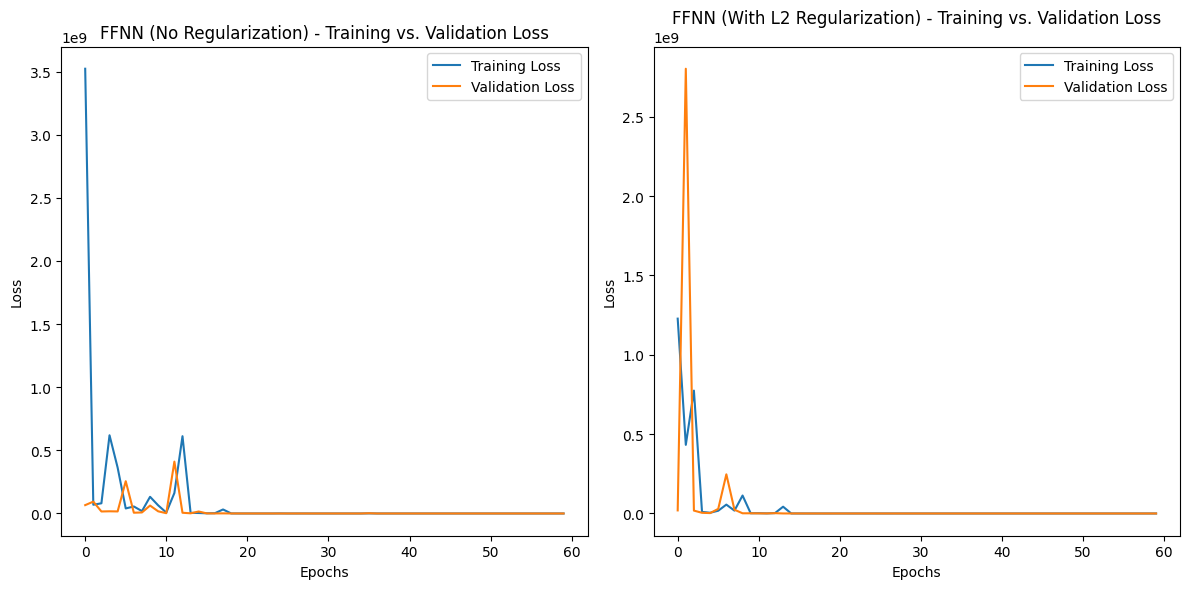

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define and train FFNN without regularization (may lead to overfitting)
ffnn_no_regularization = models.Sequential()
ffnn_no_regularization.add(layers.Dense(64, activation='relu'))
ffnn_no_regularization.add(layers.Dense(32, activation='relu'))
ffnn_no_regularization.add(layers.Dense(16, activation='relu'))
ffnn_no_regularization.add(layers.Dense(1))
ffnn_no_regularization.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
history_no_regularization = ffnn_no_regularization.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=0)

# Define and train FFNN with L2 regularization
ffnn_with_l2 = models.Sequential()
ffnn_with_l2.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
ffnn_with_l2.add(layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
ffnn_with_l2.add(layers.Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
ffnn_with_l2.add(layers.Dense(1))
ffnn_with_l2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
history_with_l2 = ffnn_with_l2.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=0)

# Evaluate both models
mse_no_regularization = mean_squared_error(y_test, ffnn_no_regularization.predict(X_test))
mae_no_regularization = mean_absolute_error(y_test, ffnn_no_regularization.predict(X_test))

mse_with_l2 = mean_squared_error(y_test, ffnn_with_l2.predict(X_test))
mae_with_l2 = mean_absolute_error(y_test, ffnn_with_l2.predict(X_test))

# Print MSE and MAE for both models
print('FFNN (No Regularization) MSE:', mse_no_regularization)
print('FFNN (No Regularization) MAE:', mae_no_regularization)

print('FFNN (With L2 Regularization) MSE:', mse_with_l2)
print('FFNN (With L2 Regularization) MAE:', mae_with_l2)

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))

# Plot for FFNN without regularization
plt.subplot(1, 2, 1)
plt.plot(history_no_regularization.history['loss'], label='Training Loss')
plt.plot(history_no_regularization.history['val_loss'], label='Validation Loss')
plt.title('FFNN (No Regularization) - Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for FFNN with L2 regularization
plt.subplot(1, 2, 2)
plt.plot(history_with_l2.history['loss'], label='Training Loss')
plt.plot(history_with_l2.history['val_loss'], label='Validation Loss')
plt.title('FFNN (With L2 Regularization) - Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Improving the accuracy

- Improving the accuracy involves many techniques and it also depends on the model and the dataset
- From our previous models we can see that our linear models didn't do very well and there's room for improvement
- Let's take a look at our LinearRegression model again

MSE: 0.08997812485644437
MAE: 0.23137879766509853


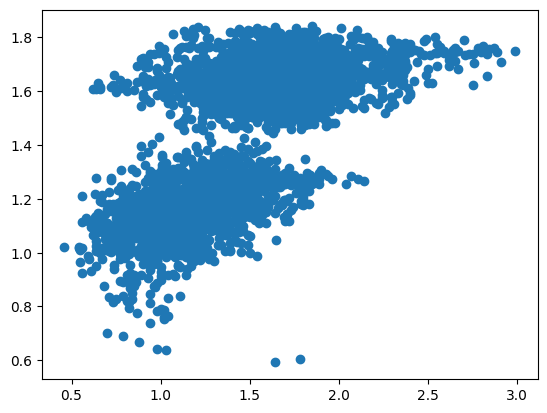

In [41]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
pred = linear_regression.predict(X_test)

print('MSE:', mean_squared_error(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))

plt.scatter(y_test,pred)

- The MSE when compared to other models such as RamdomForest is lower and the data points don't quite form a straight line, let's try to improve this

- First let's add __regularization__ to our mode, regularization typically helps prevent overfitting and improve the model's regularization. In this case we'll use L2 (Ridge) regularization
- Let's also use __feature scaling__ to ensure that our model will converge

MSE: 0.08939738248410041
MAE: 0.23104199139739462


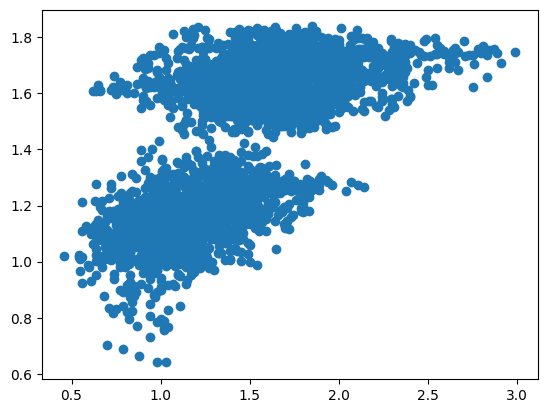

In [42]:
# L2 regularization (Ridge)
ridge_model = Ridge(alpha= 0.1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model.fit(X_train_scaled, y_train)

pred = ridge_model.predict(X_test_scaled)
print('MSE:', mean_squared_error(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))
plt.scatter(y_test, pred)

- The result barely changes, so the problem could be because of the feature. Lets perform __Feature Selection__ to further optimize our model

MSE: 0.08079371783627008
MAE: 0.2194941674260212


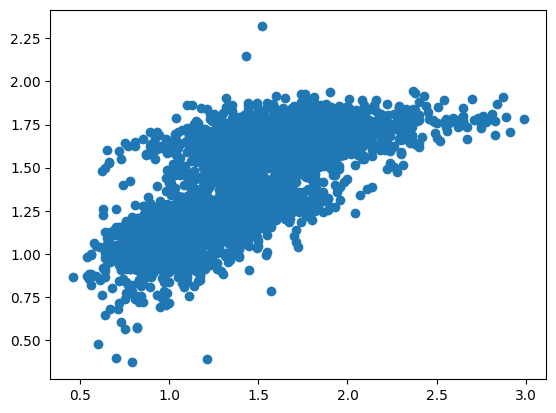

In [43]:
scaler = StandardScaler()

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

ridge_model.fit(X_train_scaled, y_train)

pred = ridge_model.predict(X_test_scaled)
print('MSE:', mean_squared_error(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))
plt.scatter(y_test, pred)

- After performing feature selection, we can see that our model has been improved, the data points now form a straighter line although it is still not as good as RandomForest